In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
df = pd.read_csv("insurance2.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [11]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [13]:
mean_charges = df["charges"].mean()

std_charges = df["charges"].std()

print("Mean of insurance charges:", mean_charges)
print("Standard deviation of insurance charges:", std_charges)

Mean of insurance charges: 13270.422265141257
Standard deviation of insurance charges: 12110.011236693994


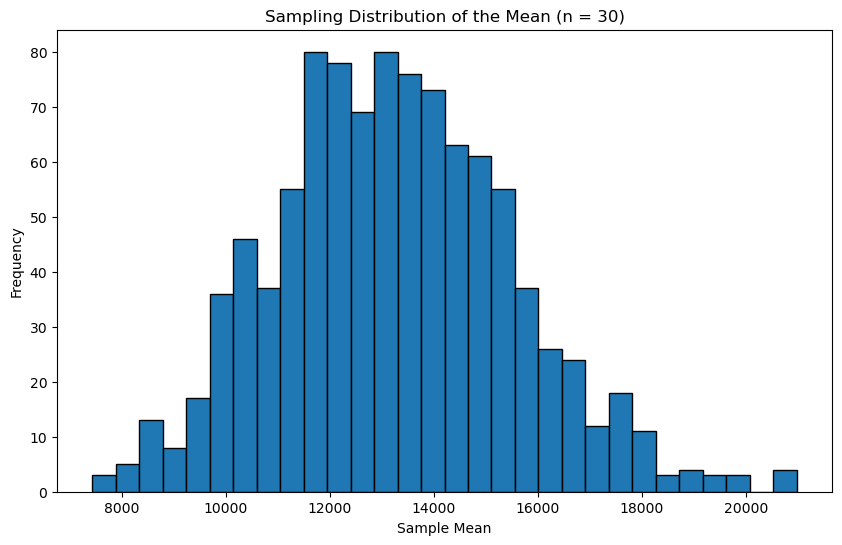

In [15]:
sample_means = []

for _ in range(1000):
    sample = df["charges"].sample(n=30, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
plt.figure(figsize=(10,6))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("Sampling Distribution of the Mean (n = 30)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [17]:
sample = df["charges"].sample(n=30, random_state=1)
sample_mean = sample.mean()
sample_std = sample.std()
sample_size = 30

# Z-score for 95% confidence level
z_score = stats.norm.ppf(0.975)

# Margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("Sample Mean:", sample_mean)
print("95% Confidence Interval: [", ci_lower, ",", ci_upper, "]")


Sample Mean: 11210.615230666668
95% Confidence Interval: [ 7709.632921626862 , 14711.597539706474 ]


In [19]:
# Separate charges for smokers and non-smokers
smoker_charges = df[df["smoker"] == 1]["charges"]
nonsmoker_charges = df[df["smoker"] == 0]["charges"]

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103


### Summary:
In this section, I calculated the average insurance charges and the standard deviation using the full dataset. This gave me a baseline understanding of how spread out the charges are.

In [23]:
import os
os.getcwd()


'/Users/judy/Frequentist Inference - Part A.ipynb'